In [1]:
# 将png转化为chc信息源

from PIL import Image
import numpy as np
import json

def trans(img_path):
    src = Image.open(img_path + ".png")
    src_w, src_h = src.size
    w = src_w // 16
    h = src_h // 16
    img_array = np.array(src)
    for i in range(w * h):
        row = i // w
        col = i % w
        x = col * 16
        y = row * 16
        block = img_array[y:y+16, x:x+16]
        cropped = block[:13, :13]
        pixels = cropped.tolist()

        with open(f"chc/basic/{img_path}/{row}_{col}.json", "w") as f:
            json.dump(pixels, f)

trans("model") # 将 model.png 转化为chc信息源

print("done.")

done.


In [22]:
# 注册

import json

def generate(d, namespace, output):
    modified_namespace = {key: f"{d}{value}.json" for key, value in namespace.items()}
    with open(output, "w") as f:
        json.dump(modified_namespace, f)

model_cube = {
    "blank_cube": "model/0_0",
    "white_cube": "model/0_1",
    "grey_cube": "model/0_2",
    "black_cube": "model/0_3",
    "brown_cube": "model/0_4",
    "red_cube": "model/0_5",
    "orange_cube": "model/0_6",
    "yellow_cube": "model/0_7",
    "green_cube": "model/0_8",
    "olive_cube": "model/0_9",
    "mint_cube": "model/0_10",
    "cyan_cube": "model/0_11",
    "blue_cube": "model/0_12",
    "purple_cube": "model/0_13",
    "magenta_cube": "model/0_14",
    "pink_cube": "model/0_15"
}

model_stack = {
    "blank_stack": "model/1_0",
    "white_stack": "model/1_1",
    "grey_stack": "model/1_2",
    "black_stack": "model/1_3",
    "brown_stack": "model/1_4",
    "red_stack": "model/1_5",
    "oranged_stack": "model/1_6",
    "yellowd_stack": "model/1_7",
    "greend_stack": "model/1_8",
    "olived_stack": "model/1_9",
    "mintd_stack": "model/1_10",
    "cyand_stack": "model/1_11",
    "blued_stack": "model/1_12",
    "purpled_stack": "model/1_13",
    "magentad_stack": "model/1_14",
    "pinkd_stack": "model/1_15"
}

model_up = {
    "blank_up": "model/2_0",
    "white_up": "model/2_1",
    "grey_up": "model/2_2",
    "black_up": "model/2_3",
    "brown_up": "model/2_4",
    "red_up": "model/2_5",
    "orange_up": "model/2_6",
    "yellow_up": "model/2_7",
    "green_up": "model/2_8",
    "olive_up": "model/2_9",
    "mint_up": "model/2_10",
    "cyan_up": "model/2_11",
    "blue_up": "model/2_12",
    "purple_up": "model/2_13",
    "magenta_up": "model/2_14",
    "pink_up": "model/2_15"
}

model_down = {
    "blank_down": "model/3_0",
    "white_down": "model/3_1",
    "grey_down": "model/3_2",
    "black_down": "model/3_3",
    "brown_down": "model/3_4",
    "red_down": "model/3_5",
    "orange_down": "model/3_6",
    "yellow_down": "model/3_7",
    "green_down": "model/3_8",
    "olive_down": "model/3_9",
    "mint_down": "model/3_10",
    "cyan_down": "model/3_11",
    "blue_down": "model/3_12",
    "purple_down": "model/3_13",
    "magenta_down": "model/3_14",
    "pink_down": "model/3_15"
}

namespace_basic = {
    **model_cube,
    **model_stack,
    **model_up,
    **model_down
}

generate("chc/basic/", namespace_basic, "chc_basic.json")
print("done.")

done.


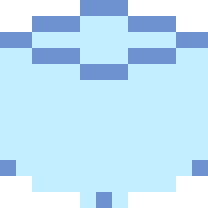

_  show mint_up


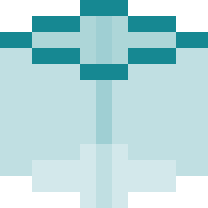

_  ?


[help]
    输入指令以执行。
    输入“.”以退出。
    show [key] : 显示图形
    


_  .


In [21]:
import re
import json
from PIL import Image
import numpy as np

def print_help():
    print("""[help]
    输入指令以执行。
    输入“.”以退出。
    show [key] : 显示图形
    """)

class View_chc:
    def __init__(self, namespace):
        with open(namespace + ".json", "r") as f:
            self.data = json.load(f)
        
    def show_image(self, key):
        with open(self.data[key], "r") as f:
            pixels = json.load(f)  
        img_array = np.array(pixels, dtype=np.uint8)  
        img = Image.fromarray(img_array, mode="RGBA")
        background = Image.new("RGBA", img.size, (255, 255, 255, 255))
        background.paste(img, (0, 0), img)
        background = background.resize((background.width * 16, background.height * 16), Image.NEAREST)
        background = background.convert("RGB")
        background.show()

view = View_chc("chc_basic")

def p(cmd):
    if cmd == ".":
        return False
    elif s := re.match(r"show (\S+)", cmd):
        key = s.group(1)
        view.show_image(key)
    else:
        print_help()
    return True

def r():
    while True:
        cmd = input("_ ")
        if not p(cmd):
            break

p("show blank_cube")
r()
